# Laptop Price Prediction using specifications 💻

#### About Dataset
What Factors Affect Laptop Computer Prices?

Several different factors can affect laptop computer prices. These factors include the brand of computer and the number of options and add-ons included in the computer package. In addition, the amount of memory and the speed of the processor can also affect pricing. Though less common, some consumers spend additional money to purchase a computer based on the overall “look” and design of the system.

In many cases, name brand computers are more expensive than generic versions. This price increase often has more to do with name recognition than any actual superiority of the product. One major difference between name brand and generic systems is that in most cases, name brand computers offer better warranties than generic versions. Having the option of returning a computer that is malfunctioning is often enough of an incentive to encourage many consumers to spend more money.

Functionality is an important factor in determining laptop computer prices. A computer with more memory often performs better for a longer time than a computer with less memory. In addition, hard drive space is also crucial, and the size of the hard drive usually affects pricing. Many consumers may also look for digital video drivers and other types of recording devices that may affect the laptop computer prices.

Most computers come with some software pre-installed. In most cases, the more software that is installed on a computer, the more expensive it is. This is especially true if the installed programs are from well-established and recognizable software publishers. Those considering purchasing a new laptop computer should be aware that many of the pre-installed programs may be trial versions only, and will expire within a certain time period. In order to keep the programs, a code will need to be purchased, and then a permanent version of the software can be downloaded.

-Many consumers who are purchasing a new computer are buying an entire package. In addition to the computer itself, these systems typically include a monitor, keyboard, and mouse. Some packages may even include a printer or digital camera. The number of extras included in a computer package usually affects laptop computer prices.
Some industry leaders in computer manufacturing make it a selling point to offer computers in sleek styling and in a variety of colors. They may also offer unusual or contemporary system design. Though this is less important to many consumers, for those who do value “looks,” this type of system may be well worth the extra cost.

In [1266]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import regex as re
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
seed = 42

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [1267]:
# Read the dataset
df_train = pd.read_csv('./dataset/laptops_train.csv', encoding = 'ISO-8859-1')
df_test = pd.read_csv('./dataset/laptops_test.csv', encoding = 'ISO-8859-1')

In [1268]:
#Combine both the datasets
df = pd.concat([df_train, df_test])

#Split the data into train and test set, which the size is 75% and 25% respectively
df_train, df_test = train_test_split(df, test_size = 0.25)

#Print the shape of the train and test set
print(df_train.shape, df_test.shape)

#Reset the index of the train and test set
df_train.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

(976, 13) (326, 13)


In [1269]:
# Print the first five rows of the train set
df_train.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,NaN,2.4kg,6304428.00
1,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.14kg,4801235.40
2,HP,ZBook 17,Workstation,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,500GB HDD,Nvidia Quadro M1200,Windows,10,3.14kg,16965847.08
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,12128688.00
4,Dell,XPS 15,Notebook,"15.6""",4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD,Nvidia GeForce GTX 1050,Windows,10,2.06kg,23465988.00


In [1270]:
# Print the dataset information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              976 non-null    object 
 1   Model Name                976 non-null    object 
 2   Category                  976 non-null    object 
 3   Screen Size               976 non-null    object 
 4   Screen                    976 non-null    object 
 5   CPU                       976 non-null    object 
 6   RAM                       976 non-null    object 
 7    Storage                  976 non-null    object 
 8   GPU                       976 non-null    object 
 9   Operating System          976 non-null    object 
 10  Operating System Version  857 non-null    object 
 11  Weight                    976 non-null    object 
 12  Price                     976 non-null    float64
dtypes: float64(1), object(12)
memory usage: 99.3+ KB


In [1271]:
# Print the dataset description
df_train.describe()

,Price
count,9.760000e+02
mean,1.005548e+07
std,6.247874e+06
min,1.547208e+06
25%,5.326308e+06
50%,8.758620e+06
75%,1.332911e+07
max,5.423231e+07


## Data Cleaning

In [1272]:
# Rename every columns to lowercase
df_train = df_train.rename(columns = str.lower)
df_test = df_test.rename(columns = str.lower)

In [1273]:
# Print the columns name
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'screen',
       'cpu', 'ram', ' storage', 'gpu', 'operating system',
       'operating system version', 'weight', 'price'],
      dtype='object')

In [1274]:
# Check for duplicates
duplicates = df_train[df_train.duplicated()]
print("Number of duplicated rows:", len(duplicates))

# Remove duplicated rows
df_train = df_train.drop_duplicates()

# Verify that duplicates have been removed
duplicates = df_train[df_train.duplicated()]
print("Number of remaining duplicated rows:", len(duplicates))

Number of duplicated rows: 11
Number of remaining duplicated rows: 0


## Dataset Cleaning + Feature Engineering


In [1275]:
# Display the screen column
df_train['screen']

0                        Full HD 1920x1080
1                                 1366x768
2                        Full HD 1920x1080
3                        Full HD 1920x1080
4      4K Ultra HD / Touchscreen 3840x2160
                      ...                 
971                      Full HD 1920x1080
972            IPS Panel Full HD 1920x1080
973                      Full HD 1920x1080
974                      Full HD 1920x1080
975                      Full HD 1920x1080
Name: screen, Length: 965, dtype: object

### Feature Engineering on Screen Resolution

In [1276]:
# Extract the screen size from the screen column
df_train['resolution'] = df_train['screen'].str.extract(r'(\d+x\d+)')
df_test['resolution'] = df_test['screen'].str.extract(r'(\d+x\d+)')

In [1277]:
# Remove the screen size (Ex : 1920x1080 ) from the screen column and store it in a new column named screen_type
df_train['screen_type'] = df_train['screen'].replace(r'(\d+x\d+)','', regex = True)
df_test['screen_type'] = df_test['screen'].replace(r'(\d+x\d+)','', regex = True)

In [1278]:
# Remove the screen type (Ex : Full HD ) from the screen_type column
df_train['screen_type'] = df_train['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'(Full HD|Quad HD|Quad HD|\+|/|4K Ultra HD)','', regex = True)

In [1279]:
df_train['screen_type']

0                    
1                    
2                    
3                    
4        Touchscreen 
            ...      
971                  
972       IPS Panel  
973                  
974                  
975                  
Name: screen_type, Length: 965, dtype: object

In [1280]:
# Extract the screen type (Ex : Touchscreen ) from the screen_type column and store it in a new column named touchscreen
# Remove the screen type (Ex : Touchscreen ) from the screen_type column
df_train['touchscreen'] = df_train['screen_type'].str.extract(r'(Touchscreen)')
df_train['screen_type'] = df_train['screen_type'].replace(r'(Touchscreen)','', regex = True)

df_test['touchscreen'] = df_test['screen_type'].str.extract(r'(Touchscreen)')
df_test['screen_type'] = df_test['screen_type'].replace(r'(Touchscreen)','', regex = True)

In [1281]:
# Count the number of Touchscreen 
df_train['touchscreen'].value_counts()

touchscreen
Touchscreen    147
Name: count, dtype: int64

In [1282]:
# Replace the Touchscreen with 1 and nan with 0
df_train['touchscreen'] = df_train['touchscreen'].replace('Touchscreen', 1)
df_train['touchscreen'] = df_train['touchscreen'].replace(np.nan, 0)

df_test['touchscreen'] = df_test['touchscreen'].replace('Touchscreen', 1)
df_test['touchscreen'] = df_test['touchscreen'].replace(np.nan, 0)

In [1283]:
# Count the number of Touchscreen
df_train['touchscreen'].value_counts()

touchscreen
0.0    818
1.0    147
Name: count, dtype: int64

In [1284]:
# Count the number of IPS Display
df_train['screen_type'].value_counts()

screen_type
                             403
                             223
IPS Panel                    204
IPS Panel                     57
                              55
IPS Panel Retina Display      13
IPS Panel                     10
Name: count, dtype: int64

In [1285]:
# Replace the space with empty string and display the screen type
df_train['screen_type'] = df_train['screen_type'].replace(r' ','', regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r' ','', regex = True)

df_train['screen_type'].value_counts()

screen_type
                         681
IPSPanel                 271
IPSPanelRetinaDisplay     13
Name: count, dtype: int64

In [1286]:
# Replace the empty string with nan
df_train['screen_type'] = df_train['screen_type'].replace(r'^\s*$', np.nan, regex = True)
df_test['screen_type'] = df_test['screen_type'].replace(r'^\s*$', np.nan, regex = True)

df_train['screen_type'].value_counts()

screen_type
IPSPanel                 271
IPSPanelRetinaDisplay     13
Name: count, dtype: int64

In [1287]:
# Display the df_train
df_train.head()

,manufacturer,model name,category,screen size,screen,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,NaN,2.4kg,6304428.00,1920x1080,NaN,0.0
1,Dell,Inspiron 3567,Notebook,"15.6""",1366x768,Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.14kg,4801235.40,1366x768,NaN,0.0
2,HP,ZBook 17,Workstation,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,500GB HDD,Nvidia Quadro M1200,Windows,10,3.14kg,16965847.08,1920x1080,NaN,0.0
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,1GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,12128688.00,1920x1080,NaN,0.0
4,Dell,XPS 15,Notebook,"15.6""",4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD,Nvidia GeForce GTX 1050,Windows,10,2.06kg,23465988.00,3840x2160,NaN,1.0


In [1288]:
# Drop the screen column
df_train = df_train.drop('screen', axis = 1)
df_test = df_test.drop('screen', axis = 1)

In [1289]:
# Display the df_train
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,NaN,2.4kg,6304428.00,1920x1080,NaN,0.0
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.14kg,4801235.40,1366x768,NaN,0.0
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ 2.8GHz,8GB,500GB HDD,Nvidia Quadro M1200,Windows,10,3.14kg,16965847.08,1920x1080,NaN,0.0
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U 2.5GHz,8GB,1GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,12128688.00,1920x1080,NaN,0.0
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD,Nvidia GeForce GTX 1050,Windows,10,2.06kg,23465988.00,3840x2160,NaN,1.0


In [1290]:
# Count the number of types of resolution
df_train['resolution'].value_counts()

resolution
1920x1080    624
1366x768     224
3840x2160     38
2560x1440     18
1600x900      17
3200x1800     16
2304x1440      6
1920x1200      5
2256x1504      5
2880x1800      3
2560x1600      3
1440x900       2
2160x1440      2
2400x1600      1
2736x1824      1
Name: count, dtype: int64

In [1291]:
# Count the number of types of screen type
df_train['screen_type'].value_counts()

screen_type
IPSPanel                 271
IPSPanelRetinaDisplay     13
Name: count, dtype: int64

In [1292]:
# Count the number of types of touchscreen
df_train['touchscreen'].value_counts()

touchscreen
0.0    818
1.0    147
Name: count, dtype: int64

### CPU

In [1293]:
# Display the cpu column
df_train['cpu']

0      Intel Core i5 7300HQ 2.5GHz
1       Intel Core i5 7200U 2.5GHz
2      Intel Core i7 7700HQ 2.8GHz
3       Intel Core i5 7200U 2.5GHz
4      Intel Core i7 7700HQ 2.8GHz
                  ...             
971     Intel Core i7 6600U 2.6GHz
972    Intel Core i7 7700HQ 2.8GHz
973    Intel Core i7 7700HQ 2.8GHz
974    Intel Core i7 7700HQ 2.8GHz
975    Intel Core i7 7700HQ 2.8GHz
Name: cpu, Length: 965, dtype: object

In [1294]:
# Extract the cpu GHz (Ex : 2GHz ) from the cpu column and store it in a new column named cpu_freq
df_train['cpu_freq'] = df_train['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 
df_test['cpu_freq'] = df_test['cpu'].str.extract(r'(\d+(?:\.\d+)?GHz)') 

df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ 2.5GHz,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,NaN,2.4kg,6304428.00,1920x1080,NaN,0.0,2.5GHz
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U 2.5GHz,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.14kg,4801235.40,1366x768,NaN,0.0,2.5GHz
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ 2.8GHz,8GB,500GB HDD,Nvidia Quadro M1200,Windows,10,3.14kg,16965847.08,1920x1080,NaN,0.0,2.8GHz
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U 2.5GHz,8GB,1GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,12128688.00,1920x1080,NaN,0.0,2.5GHz
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ 2.8GHz,32GB,1TB SSD,Nvidia GeForce GTX 1050,Windows,10,2.06kg,23465988.00,3840x2160,NaN,1.0,2.8GHz


In [1295]:
# Count the number of types of cpu_freq
df_train['cpu_freq'].value_counts()

cpu_freq
2.5GHz     220
2.8GHz     127
2.7GHz     122
1.6GHz      97
2.3GHz      65
1.8GHz      60
2.6GHz      48
2GHz        47
1.1GHz      42
2.4GHz      35
2.0GHz      15
1.2GHz      13
3GHz        13
2.9GHz      12
2.2GHz      10
1.5GHz       9
1.44GHz      9
3.6GHz       5
1.3GHz       4
1.9GHz       2
0.9GHz       2
2.1GHz       2
1.0GHz       1
2.50GHz      1
1.92GHz      1
3.1GHz       1
1.60GHz      1
3.2GHz       1
Name: count, dtype: int64

In [1296]:
# Replace the GHz with empty string and rename the column to cpu_freq(GHz)
df_train['cpu_freq'] = df_train['cpu_freq'].str.replace('GHz', '')
df_train.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)

df_test['cpu_freq'] = df_test['cpu_freq'].str.replace('GHz', '')
df_test.rename(columns = {'cpu_freq': 'cpu_freq(GHz)'}, inplace = True)


In [1297]:
# Convert the cpu_freq(GHz) column to float
df_train['cpu_freq(GHz)'] = df_train['cpu_freq(GHz)'].astype(float)

In [1298]:
# Replace the GHz with empty string in the cpu column
df_train['cpu']= df_train['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)
df_test['cpu']= df_test['cpu'].str.replace(r'(\d+(?:\.\d+)?GHz)', '', regex = True)

In [1299]:
# Display the table
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram,storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ,8GB,1TB HDD,Nvidia GeForce GTX 1050,Linux,NaN,2.4kg,6304428.00,1920x1080,NaN,0.0,2.5
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U,8GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.14kg,4801235.40,1366x768,NaN,0.0,2.5
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ,8GB,500GB HDD,Nvidia Quadro M1200,Windows,10,3.14kg,16965847.08,1920x1080,NaN,0.0,2.8
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U,8GB,1GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,12128688.00,1920x1080,NaN,0.0,2.5
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ,32GB,1TB SSD,Nvidia GeForce GTX 1050,Windows,10,2.06kg,23465988.00,3840x2160,NaN,1.0,2.8


### RAM

In [1300]:
# Replace the GB with empty string in the cpu column
df_train['ram'] = df_train['ram'].str.replace('GB', '')
df_test['ram'] = df_test['ram'].str.replace('GB', '')

In [1301]:
# Rename the column to ram(GB)
df_train.rename(columns = {'ram': 'ram(GB)'}, inplace = True)
df_test.rename(columns = {'ram': 'ram(GB)'}, inplace = True)

In [1302]:
# Convert the ram(GB) column to float
df_train['ram(GB)'] = df_train['ram(GB)'].astype(float)
df_test['ram(GB)'] = df_test['ram(GB)'].astype(float)

In [1303]:
# Display the table
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz)
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,1TB HDD,Nvidia GeForce GTX 1050,Linux,NaN,2.4kg,6304428.00,1920x1080,NaN,0.0,2.5
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U,8.0,1TB HDD,Intel HD Graphics 620,Windows,10,2.14kg,4801235.40,1366x768,NaN,0.0,2.5
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ,8.0,500GB HDD,Nvidia Quadro M1200,Windows,10,3.14kg,16965847.08,1920x1080,NaN,0.0,2.8
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U,8.0,1GB SSD,Intel HD Graphics 620,Windows,10,1.7kg,12128688.00,1920x1080,NaN,0.0,2.5
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ,32.0,1TB SSD,Nvidia GeForce GTX 1050,Windows,10,2.06kg,23465988.00,3840x2160,NaN,1.0,2.8


### Memory

In [1304]:
# Display the table of the storage column
df_train[' storage']

0                   1TB HDD
1                   1TB HDD
2                 500GB HDD
3                   1GB SSD
4                   1TB SSD
               ...         
971               256GB SSD
972    256GB SSD +  1TB HDD
973               512GB SSD
974    128GB SSD +  1TB HDD
975               256GB SSD
Name:  storage, Length: 965, dtype: object

In [1305]:
# List and count the storage type
df_train[' storage'].value_counts()

 storage
256GB SSD                        313
1TB HDD                          159
500GB HDD                         92
512GB SSD                         85
128GB SSD +  1TB HDD              66
128GB SSD                         61
256GB SSD +  1TB HDD              57
32GB Flash Storage                26
1TB SSD                           12
2TB HDD                           12
64GB Flash Storage                11
256GB SSD +  2TB HDD               9
512GB SSD +  1TB HDD               9
16GB Flash Storage                 7
256GB Flash Storage                7
32GB SSD                           5
1TB Hybrid                         3
16GB SSD                           3
128GB Flash Storage                3
1GB SSD                            3
1TB SSD +  1TB HDD                 2
256GB SSD +  256GB SSD             2
512GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
512GB Flash Storage                2
32GB HDD                           1
512GB SSD +  512GB SSD       

In [1306]:
# Rename the storage column to storage_1
df_train['storage_1'] = df_train[' storage']
df_test['storage_1'] = df_test[' storage']

In [1307]:
# Change the unit TB to GB and then remove the GB from the storage_1 column
df_train['storage_1'] = df_train['storage_1'].str.replace('1.0TB','1TB', regex = True)
df_train['storage_1'] = df_train['storage_1'].str.replace('1TB','1000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('2TB','2000GB')
df_train['storage_1'] = df_train['storage_1'].str.replace('GB','')
df_train['storage_1'].value_counts()

df_test['storage_1'] = df_test['storage_1'].str.replace('1.0TB','1TB', regex = True)
df_test['storage_1'] = df_test['storage_1'].str.replace('1TB','1000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('2TB','2000GB')
df_test['storage_1'] = df_test['storage_1'].str.replace('GB','')

In [1308]:
# Remove the space in the storage_1 column and store it in a new column named storage_2
df_train['storage_2'] = df_train['storage_1'].str.replace(r' ','')
df_test['storage_2'] = df_test['storage_1'].str.replace(r' ','')

df_train['storage_2'].value_counts()

storage_2
256SSD                    313
1000HDD                   159
500HDD                     92
512SSD                     85
128SSD+1000HDD             66
128SSD                     61
256SSD+1000HDD             57
32FlashStorage             26
1000SSD                    12
2000HDD                    12
64FlashStorage             11
256SSD+2000HDD              9
512SSD+1000HDD              9
16FlashStorage              7
256FlashStorage             7
32SSD                       5
1000Hybrid                  3
16SSD                       3
128FlashStorage             3
1SSD                        3
1000SSD+1000HDD             2
256SSD+256SSD               2
512SSD+2000HDD              2
256SSD+500HDD               2
512FlashStorage             2
32HDD                       1
512SSD+512SSD               1
240SSD                      1
508Hybrid                   1
128HDD                      1
8SSD                        1
128SSD+2000HDD              1
512SSD+1000Hybrid           1


In [1309]:
# Initialize the storage_1 and storage_2 column
storage_1 = []
storage_2 = []

# Split the storage_2 column into storage_1 and storage_2 column
for i in df_train['storage_2']:
    if len(re.findall(r'\+', i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        storage_1.append(one[0])
        storage_2.append('NaN')

In [1310]:
# Do the same for the test set
s1 = []
s2 = []

for i in df_test['storage_2']:
    if len(re.findall(r'\+',i)) == 1: 
        # Double drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append(one[1])
    else: 
        # Single drive
        one = re.findall(r'(\w+)', i)
        s1.append(one[0])
        s2.append('NaN')

In [1311]:
# Split the storage_1 column into storage_1_type and storage_1_gb column
storage_1_gb = []
storage_1_type = []
for i in storage_1:
    storage_1_type.append(re.findall(r'(\D\w+)', i)[0])
    storage_1_gb.append(re.findall(r'(\d+)', i)[0])


In [1312]:
# Split the storage_2 column into storage_2_type and storage_2_gb column
s1_gb = []
s1_type = []
for i in s1:
    s1_type.append(re.findall(r'(\D\w+)', i)[0])
    s1_gb.append(re.findall(r'(\d+)', i)[0])

Memory 2

In [1313]:
# Split the storage_2 column into storage_2_type and storage_2_gb column for the test set
storage_2_gb = []
storage_2_type = []
for i in storage_2:
    if i != 'NaN':
        storage_2_type.append(re.findall(r'(\D\w+)',i)[0])
        storage_2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        storage_2_type.append('NaN')
        storage_2_gb.append(0)

In [1314]:
# Split the storage_2 column into storage_2_type and storage_2_gb column for test set
s2_gb = []
s2_type = []
for i in s2:
    if i != 'NaN':
        s2_type.append(re.findall(r'(\D\w+)',i)[0])
        s2_gb.append(re.findall(r'(\d+)',i)[0])
    else:
        s2_type.append('NaN')
        s2_gb.append(0)

In [1315]:
# Get the storage_1_type and storage_1_gb column for the train set
df_train['storage_1_gb'] = storage_1_gb
df_train['storage_1_type'] = storage_1_type
df_train['storage_2_gb'] = storage_2_gb
df_train['storage_2_type'] = storage_2_type

In [1316]:
# Get the storage_1_type and storage_1_gb column for the test set
df_test['storage_1_gb'] = s1_gb
df_test['storage_1_type'] = s1_type
df_test['storage_2_gb'] = s2_gb
df_test['storage_2_type'] = s2_type

In [1317]:
# Convert the storage_1_gb and storage_2_gb column to float
df_train['storage_1_gb'] = df_train['storage_1_gb'].astype(float)
df_train['storage_2_gb'] = df_train['storage_2_gb'].astype(float)

df_test['storage_1_gb'] = df_test['storage_1_gb'].astype(float)
df_test['storage_2_gb'] = df_test['storage_2_gb'].astype(float)

In [1318]:
# Display the table
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),storage,gpu,operating system,operating system version,...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1,storage_2,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,1TB HDD,Nvidia GeForce GTX 1050,Linux,NaN,...,1920x1080,NaN,0.0,2.5,1000 HDD,1000HDD,1000.0,HDD,0.0,NaN
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U,8.0,1TB HDD,Intel HD Graphics 620,Windows,10,...,1366x768,NaN,0.0,2.5,1000 HDD,1000HDD,1000.0,HDD,0.0,NaN
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ,8.0,500GB HDD,Nvidia Quadro M1200,Windows,10,...,1920x1080,NaN,0.0,2.8,500 HDD,500HDD,500.0,HDD,0.0,NaN
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U,8.0,1GB SSD,Intel HD Graphics 620,Windows,10,...,1920x1080,NaN,0.0,2.5,1 SSD,1SSD,1.0,SSD,0.0,NaN
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ,32.0,1TB SSD,Nvidia GeForce GTX 1050,Windows,10,...,3840x2160,NaN,1.0,2.8,1000 SSD,1000SSD,1000.0,SSD,0.0,NaN


In [1319]:
# Drop the storage_1 and storage_2 column
df_train = df_train.drop(['storage_1','storage_2',' storage'], axis = 1)
df_test = df_test.drop(['storage_1','storage_2',' storage'], axis = 1)

In [1320]:
# Replce the empty string with nan
df_train = df_train.replace({'NaN' : np.nan})
df_test = df_test.replace({'NaN' : np.nan})

In [1321]:
# Display the table
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight,price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1050,Linux,NaN,2.4kg,6304428.00,1920x1080,NaN,0.0,2.5,1000.0,HDD,0.0,NaN
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,2.14kg,4801235.40,1366x768,NaN,0.0,2.5,1000.0,HDD,0.0,NaN
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ,8.0,Nvidia Quadro M1200,Windows,10,3.14kg,16965847.08,1920x1080,NaN,0.0,2.8,500.0,HDD,0.0,NaN
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.7kg,12128688.00,1920x1080,NaN,0.0,2.5,1.0,SSD,0.0,NaN
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ,32.0,Nvidia GeForce GTX 1050,Windows,10,2.06kg,23465988.00,3840x2160,NaN,1.0,2.8,1000.0,SSD,0.0,NaN


### Weight

In [1322]:
# Count the number of types of weight
df_train['weight'].value_counts()

weight
2.2kg     89
2.1kg     42
2.5kg     32
2.4kg     30
2kg       25
          ..
1.89kg     1
4kgs       1
2.99kg     1
2.94kg     1
2.77kg     1
Name: count, Length: 168, dtype: int64

In [1323]:
# Check whether all the weight contains kg
print(df_train['weight'].str.contains('kg').sum(), df_train.shape[0])

965 965


In [1324]:
# Replace the kg with empty string and convert the weight column to float
df_train['weight'] = df_train['weight'].str.replace('kg', '')
df_train['weight'] = df_train['weight'].str.replace('s', '').astype(float)
df_test['weight'] = df_test['weight'].str.replace('kg', '')
df_test['weight'] = df_test['weight'].str.replace('s', '').astype(float)

In [1325]:
# Rename the weight column to weight(kg)
df_train.rename(columns = {'weight': 'weight(kg)'}, inplace = True)
df_test.rename(columns = {'weight': 'weight(kg)'}, inplace = True)

In [1326]:
# Display the table
df_train.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),price,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1050,Linux,NaN,2.40,6304428.00,1920x1080,NaN,0.0,2.5,1000.0,HDD,0.0,NaN
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,2.14,4801235.40,1366x768,NaN,0.0,2.5,1000.0,HDD,0.0,NaN
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ,8.0,Nvidia Quadro M1200,Windows,10,3.14,16965847.08,1920x1080,NaN,0.0,2.8,500.0,HDD,0.0,NaN
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.70,12128688.00,1920x1080,NaN,0.0,2.5,1.0,SSD,0.0,NaN
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ,32.0,Nvidia GeForce GTX 1050,Windows,10,2.06,23465988.00,3840x2160,NaN,1.0,2.8,1000.0,SSD,0.0,NaN


### CPU and GPU manifacturing companies


In [1327]:
# Extract the cpu brand (Ex : Intel ) from the cpu column and store it in a new column named cpu_brand
df_train['cpu_brand'] = df_train['cpu'].str.extract(r'^(\w+)')
df_test['cpu_brand'] = df_test['cpu'].str.extract(r'^(\w+)')

df_train['cpu_brand'].value_counts()

cpu_brand
Intel    917
AMD       48
Name: count, dtype: int64

In [1328]:
# Extract the gpu brand (Ex : Intel ) from the gpu column and store it in a new column named gpu_brand
df_train['gpu_brand'] = df_train['gpu'].str.extract(r'^(\w+)')
df_test['gpu_brand'] = df_test['gpu'].str.extract(r'^(\w+)')

df_train['gpu_brand'].value_counts()

gpu_brand
Intel     538
Nvidia    299
AMD       128
Name: count, dtype: int64

In [1329]:
#Display the table info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 965 entries, 0 to 975
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              965 non-null    object 
 1   model name                965 non-null    object 
 2   category                  965 non-null    object 
 3   screen size               965 non-null    object 
 4   cpu                       965 non-null    object 
 5   ram(GB)                   965 non-null    float64
 6   gpu                       965 non-null    object 
 7   operating system          965 non-null    object 
 8   operating system version  848 non-null    object 
 9   weight(kg)                965 non-null    float64
 10  price                     965 non-null    float64
 11  resolution                965 non-null    object 
 12  screen_type               284 non-null    object 
 13  touchscreen               965 non-null    float64
 14  cpu_freq(GHz)  

In [1330]:
# Export the clean dataset
df_train.to_csv('laptop-clean-train.csv', index = False)
df_test.to_csv('laptop-clean-test.csv', index = False)

## Exploratory Data Analysis EDA


In [1331]:
# Read the clean dataset 
df1 = pd.read_csv('laptop-clean-train.csv')
df1.head()

,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1050,Linux,NaN,2.40,...,1920x1080,NaN,0.0,2.5,1000.0,HDD,0.0,NaN,Intel,Nvidia
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,2.14,...,1366x768,NaN,0.0,2.5,1000.0,HDD,0.0,NaN,Intel,Intel
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ,8.0,Nvidia Quadro M1200,Windows,10,3.14,...,1920x1080,NaN,0.0,2.8,500.0,HDD,0.0,NaN,Intel,Nvidia
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.70,...,1920x1080,NaN,0.0,2.5,1.0,SSD,0.0,NaN,Intel,Intel
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ,32.0,Nvidia GeForce GTX 1050,Windows,10,2.06,...,3840x2160,NaN,1.0,2.8,1000.0,SSD,0.0,NaN,Intel,Nvidia


In [1332]:
# Copy the clean dataset
df_clean = df1.copy()

In [1333]:
# Display the table info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 965 entries, 0 to 964
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   manufacturer              965 non-null    object 
 1   model name                965 non-null    object 
 2   category                  965 non-null    object 
 3   screen size               965 non-null    object 
 4   cpu                       965 non-null    object 
 5   ram(GB)                   965 non-null    float64
 6   gpu                       965 non-null    object 
 7   operating system          965 non-null    object 
 8   operating system version  848 non-null    object 
 9   weight(kg)                965 non-null    float64
 10  price                     965 non-null    float64
 11  resolution                965 non-null    object 
 12  screen_type               284 non-null    object 
 13  touchscreen               965 non-null    float64
 14  cpu_freq(G

In [1334]:
# Define the function to plot the boxplot and histogram
def num_plot(df, col, title, symb):
    fig, ax = plt.subplots(2, 1, sharex = True, figsize = (8,5),gridspec_kw = {"height_ratios": (.2, .8)})
    ax[0].set_title(title)
    sns.boxplot(x = col, data = df, ax = ax[0])
    ax[0].set(yticks = [])
    sns.histplot(x = col, data = df, ax = ax[1])
    ax[1].set_xlabel(col)
    plt.axvline(df[col].mean(), color = 'darkgreen', label = 'mean=' + str(np.round(df[col].mean(),1)) + symb)
    plt.axvline(df[col].median(), color = 'red', label = 'median='+ str(np.round(df[col].median(),1)) + symb)
    plt.axvline(df[col].mode()[0], color = 'purple', label = 'mode='+ str(df[col].mode()[0]) + symb)
    plt.legend(bbox_to_anchor = (1, 1.03), ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.tight_layout()
    plt.show()

## Which brand is the most frequent in the dataframe?

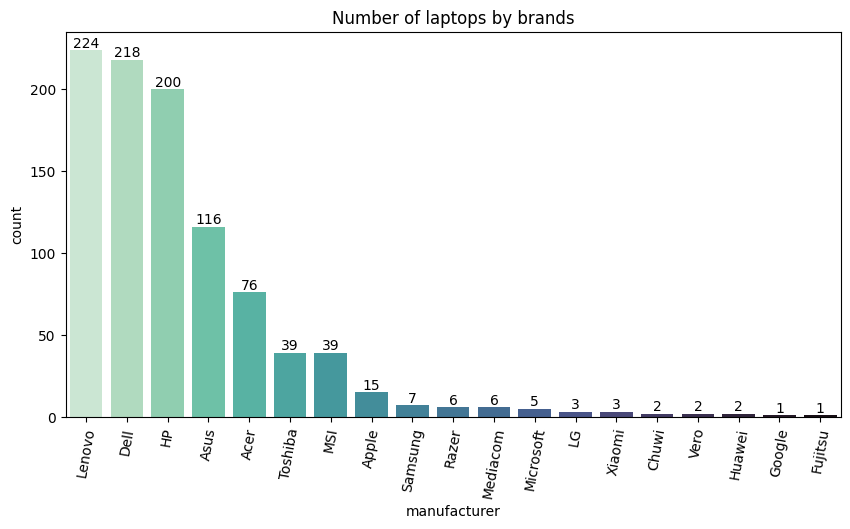

In [1335]:
# Display histogram of the number of laptops by brands
fig, ax  = plt.subplots(figsize = (10,5))
ax = sns.countplot(x = 'manufacturer', data = df_train, palette='mako_r', order = df_train['manufacturer'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.bar_label(ax.containers[0])
plt.title('Number of laptops by brands')
plt.show()

Most of laptops are from Dell, Lenovo and HP.

## What type of laptop is the most frequent?

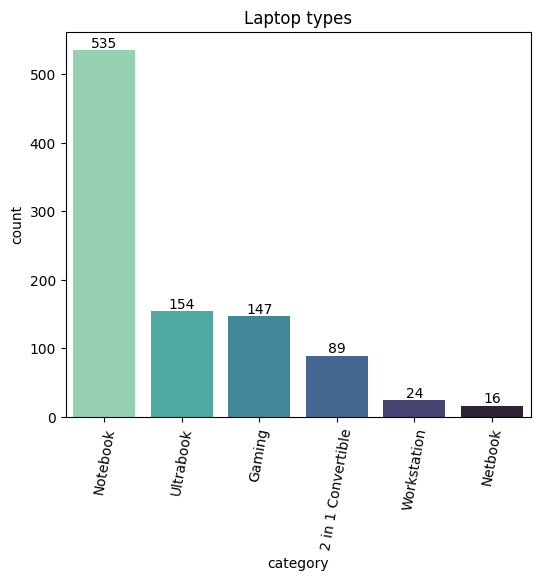

In [1336]:
# Display the most frequent laptop brands
fig, ax  = plt.subplots(figsize = (6,5))
ax=sns.countplot(x = 'category', data = df_train, palette = 'mako_r', order = df_train['category'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop types')
plt.show()

Most laptops are of type notebooks followed by ultrabook and then the gaming ones.

## Which size is the most popular?

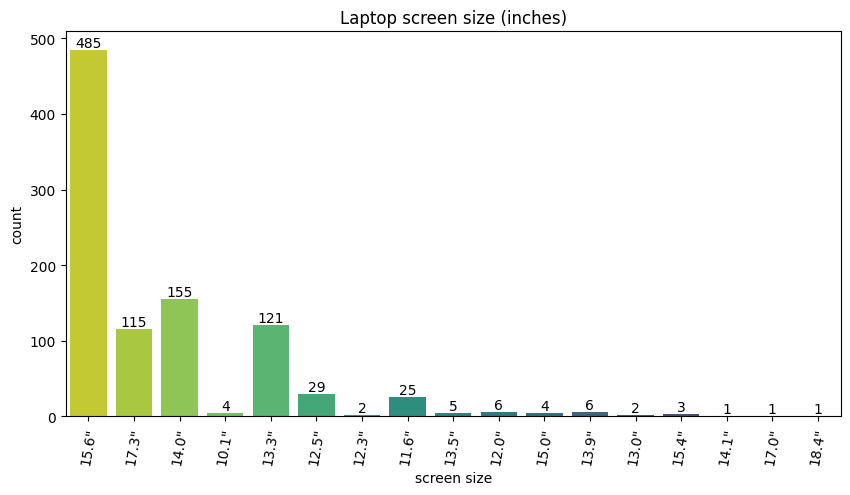

In [1337]:
# Display the most popular laptop size
fig, ax  = plt.subplots(figsize = (10,5))
ax=sns.countplot(x = 'screen size', data = df_train, palette = 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

Majority of the laptops have 15.6 inches.

There are very few laptops with some "non conventional" sizes, which indeed appears in just few rows. For this reason, we will only keep laptops with the more conventional sizes.

In [1338]:
# Count the number of types of screen size and keep the top 6
inches_list = df_train['screen size'].value_counts().index[:6].tolist()
inches_list

['15.6"', '14.0"', '13.3"', '17.3"', '12.5"', '11.6"']

In [1339]:
# Check the screen size whether it is in the top 6 list
df_clean = df_clean[df_clean['screen size'].isin(inches_list)]
df_test = df_test[df_test['screen size'].isin(inches_list)]

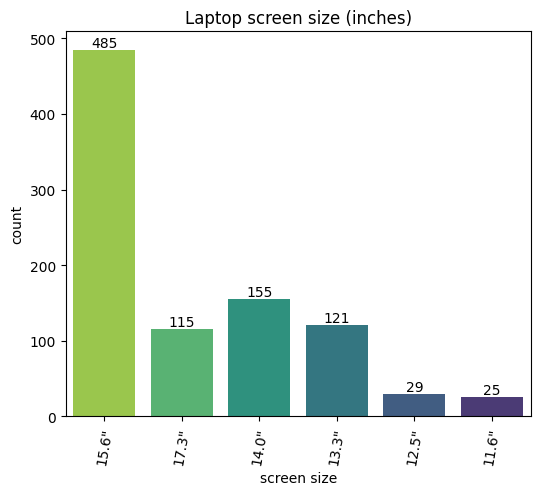

In [1340]:
# Display the most popular laptop size
fig, ax  = plt.subplots(figsize = (6,5))
ax=sns.countplot(x = 'screen size', data = df_clean, palette = 'viridis_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Laptop screen size (inches)')
plt.show()

In [1341]:
# Calculate the number of outliers
print('We removed {} outliers!'.format(len(df_train)-len(df_clean)))

We removed 35 outliers!


### How is weight distributed among the laptops?


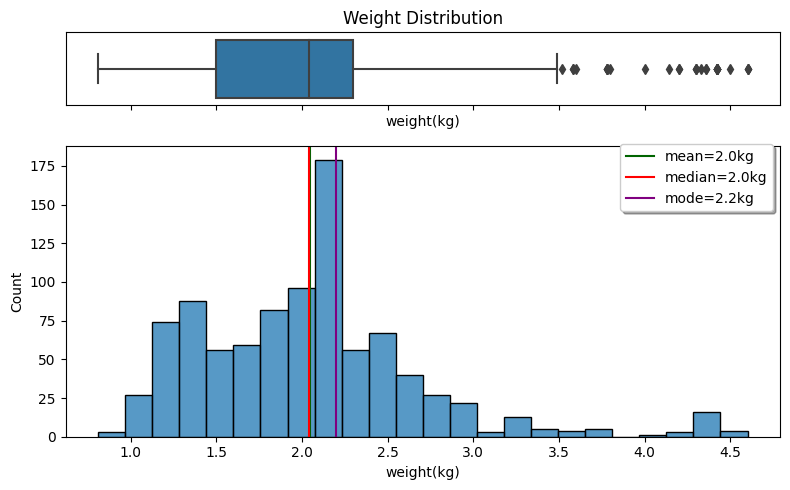

In [1342]:
# Display the boxplot and histogram of the Weight Distribution
num_plot(df_clean, 'weight(kg)', 'Weight Distribution','kg')

### How is price distributed among the laptops?


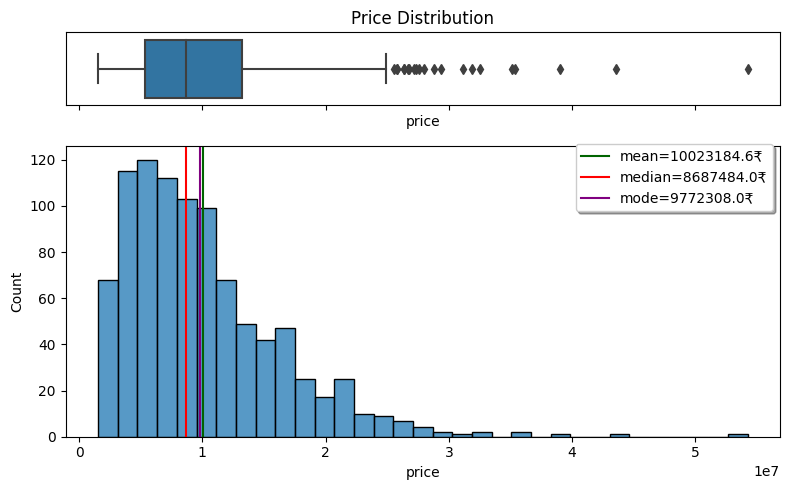

In [1343]:
# Display the boxplot and histogram of the Price Distribution
num_plot(df_clean, 'price', 'Price Distribution','₹')


In [1344]:
# Display the boxplot in the price column
import plotly.express as px
fig = px.box(df_train, y = 'price')
fig.show()

In [1345]:
# List all the columns
df_train.columns


Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

<Axes: xlabel='category', ylabel='price'>

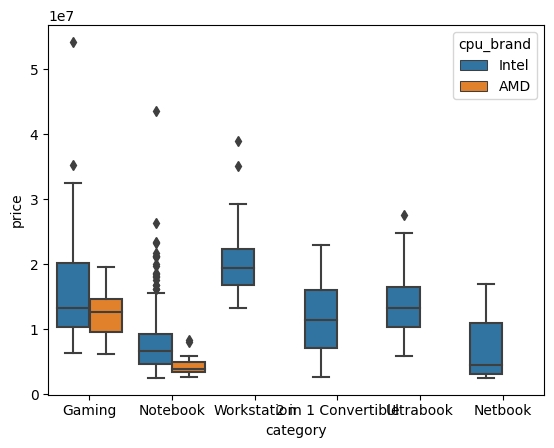

In [1346]:
# Display the boxplot for each category based on the price
sns.boxplot(x = 'category', y = 'price', data = df_train[df_train['price'] > 2500000], hue = 'cpu_brand')

In [1347]:
# Display the price which is greater than 2500000
df_train[df_train['price'] > 2500000]


,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,Acer,A715-71G-59DH (i5-7300HQ/8GB/1TB/GeForce,Gaming,"15.6""",Intel Core i5 7300HQ,8.0,Nvidia GeForce GTX 1050,Linux,NaN,2.40,...,1920x1080,NaN,0.0,2.5,1000.0,HDD,0.0,NaN,Intel,Nvidia
1,Dell,Inspiron 3567,Notebook,"15.6""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,2.14,...,1366x768,NaN,0.0,2.5,1000.0,HDD,0.0,NaN,Intel,Intel
2,HP,ZBook 17,Workstation,"17.3""",Intel Core i7 7700HQ,8.0,Nvidia Quadro M1200,Windows,10,3.14,...,1920x1080,NaN,0.0,2.8,500.0,HDD,0.0,NaN,Intel,Nvidia
3,Lenovo,Thinkpad T470,Notebook,"14.0""",Intel Core i5 7200U,8.0,Intel HD Graphics 620,Windows,10,1.70,...,1920x1080,NaN,0.0,2.5,1.0,SSD,0.0,NaN,Intel,Intel
4,Dell,XPS 15,Notebook,"15.6""",Intel Core i7 7700HQ,32.0,Nvidia GeForce GTX 1050,Windows,10,2.06,...,3840x2160,NaN,1.0,2.8,1000.0,SSD,0.0,NaN,Intel,Nvidia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
971,Lenovo,ThinkPad T460,Ultrabook,"14.0""",Intel Core i7 6600U,8.0,Intel HD Graphics 520,Windows,7,1.70,...,1920x1080,NaN,0.0,2.6,256.0,SSD,0.0,NaN,Intel,Intel
972,Lenovo,Legion Y520-15IKBN,Gaming,"15.6""",Intel Core i7 7700HQ,16.0,Nvidia GeForce GTX 1050 Ti,Windows,10,2.50,...,1920x1080,IPSPanel,0.0,2.8,256.0,SSD,1000.0,HDD,Intel,Nvidia
973,Razer,Blade Pro,Gaming,"14.0""",Intel Core i7 7700HQ,16.0,Nvidia GeForce GTX 1060,Windows,10,1.95,...,1920x1080,NaN,0.0,2.8,512.0,SSD,0.0,NaN,Intel,Nvidia
974,Asus,FX502VM-AS73 (i7-7700HQ/16GB/1TB,Notebook,"15.6""",Intel Core i7 7700HQ,16.0,Nvidia GeForce GTX 1060,Windows,10,2.20,...,1920x1080,NaN,0.0,2.8,128.0,SSD,1000.0,HDD,Intel,Nvidia


## How is RAM distributed among the laptops?


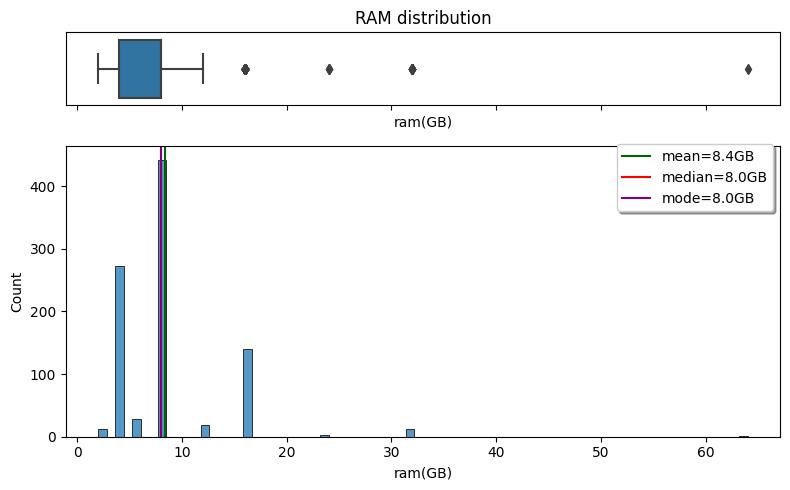

In [1348]:
# Display the boxplot for each category based on the RAM 
num_plot(df_clean, 'ram(GB)','RAM distribution','GB')

Most laptops have 8 GB ram.



### How is CPU frequency distributed among the laptops?


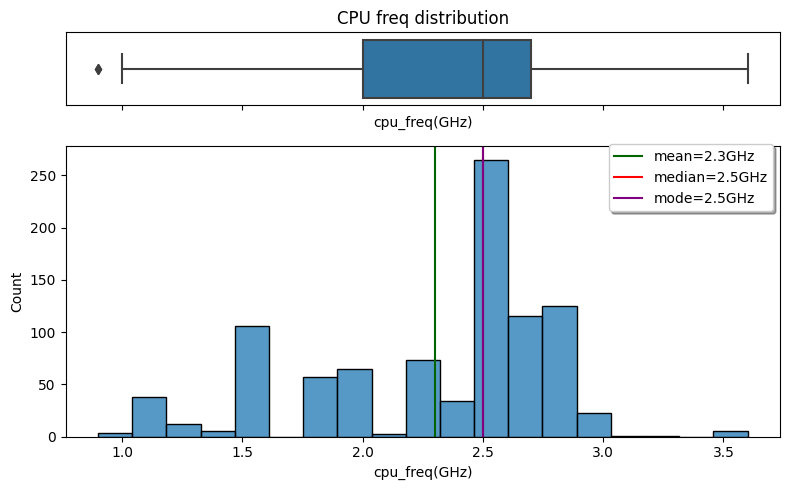

In [1349]:
## Display the boxplot and histogram of the CPU freq Distribution
num_plot(df_clean, 'cpu_freq(GHz)','CPU freq distribution','GHz')

Most laptops have 2.5 GHz CPU



### How is Hard Drive capacity distributed among the laptops?


In [1350]:
# Display Column names
df_train.columns


Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

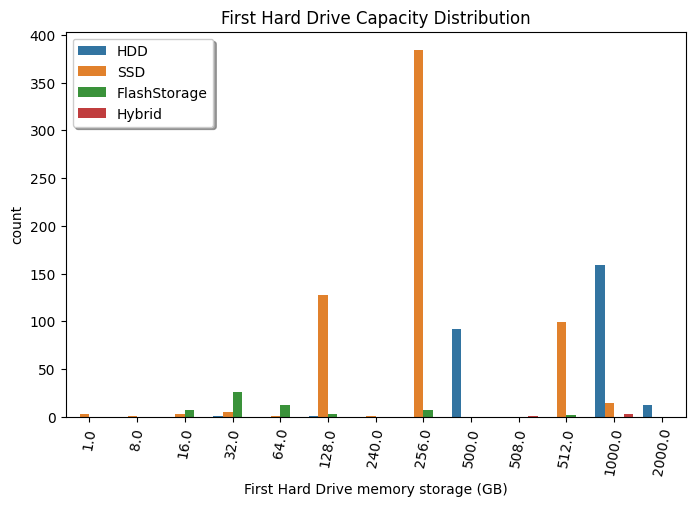

In [1351]:
# Display the histogram of the Hard Drive capacity
fig, ax  = plt.subplots(figsize=(8,5))
ax = sns.countplot(x = 'storage_1_gb', data = df_train, hue = 'storage_1_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('First Hard Drive memory storage (GB)')
plt.title('First Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

Most PCs have 256 GB of storage, which is for the most part SSD. Moreover, for storage of 1 TB or higher, most of them are HDD.

### Second hard Drive analysis


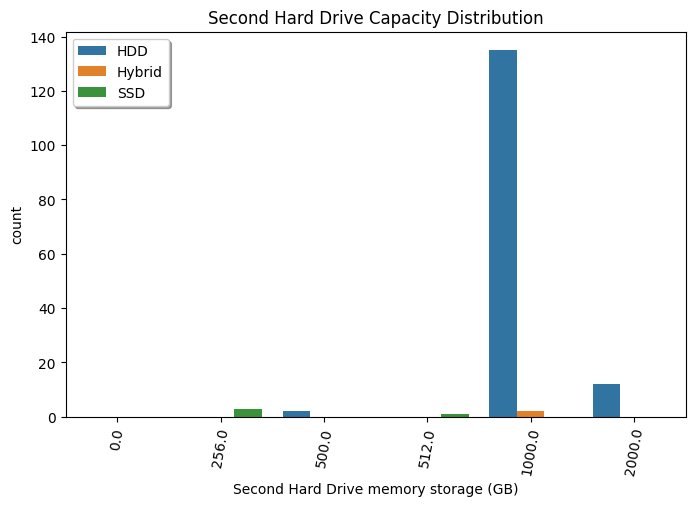

In [1352]:
# Display the histogram of the Second Hard Drive capacity
fig, ax  = plt.subplots(figsize = (8,5))
ax=sns.countplot(x = 'storage_2_gb', data = df_train, hue = 'storage_2_type')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 80)
ax.set_xlabel('Second Hard Drive memory storage (GB)')
plt.title('Second Hard Drive Capacity Distribution')
plt.legend(loc = 'upper left', ncol = 1, fancybox = True, shadow = True, frameon = True)
plt.show()

Most of second hard drive storages are 1 TB HDD disks

## Multivariate outliers detection


In [1353]:
# Define Learning Rate Plot method
def lr_plot(df, col_x, col_y, leg):
    slope, intercept, r_value, p_value, std_err = stats.linregress(df[col_x],df[col_y])
    sns.regplot(x = col_x, y = col_y, data = df, color='#0d98ba', line_kws = {'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
    plt.legend(loc = leg, ncol = 1, fancybox = True, shadow = True, frameon = True)
    plt.title(col_y + ' VS ' + col_x)
    plt.show()

    return slope, intercept

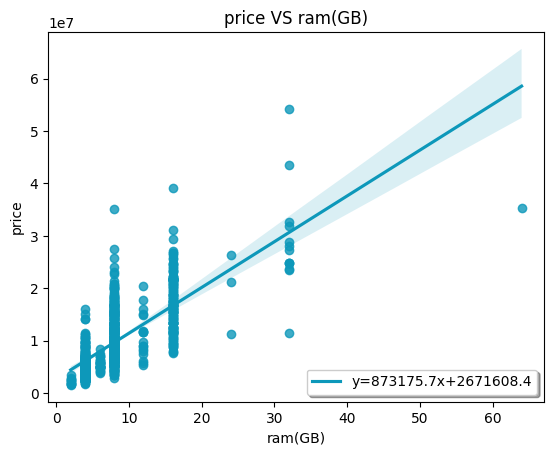

In [1354]:
# Display the learning rate of price vs ram(GB)
slope, intercept = lr_plot(df_clean,'ram(GB)','price', 'lower right')


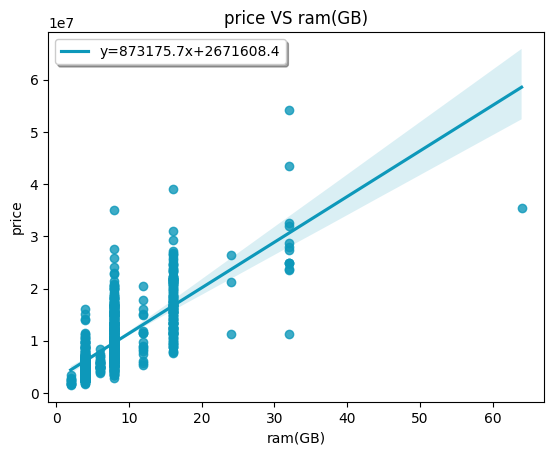

In [1355]:
slope, intercept = lr_plot(df_clean, 'ram(GB)', 'price', 'upper left')


By removing the outlier value we can see that the slope increases and the intercept decreases.



### Price vs CPU Frequency


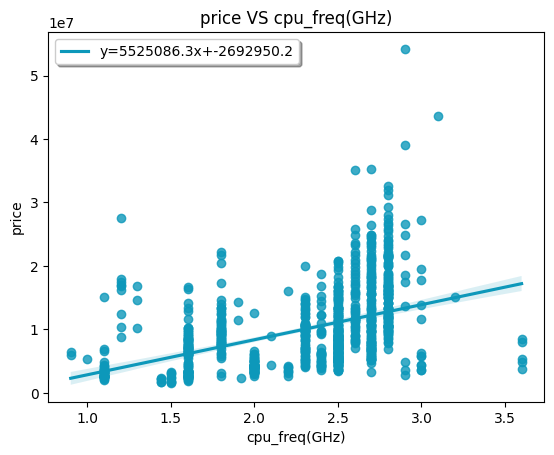

In [1356]:
# Display the learning rate of price vs cpu_freq(GHz)
slope, intercept = lr_plot(df_clean, 'cpu_freq(GHz)', 'price', 'upper left')


We can see a positive trend between price and the CPU frequency, with no obvious outliers.



### Price vs inches


In [1357]:
# Cleaning the screen size column and convert it to float
df_clean.reset_index(drop = True, inplace = True)
df_test.reset_index(drop = True, inplace = True)

for i in range(len(df_clean)):
    df_clean['screen size'][i] = re.sub('"', '', df_clean['screen size'][i])

for i in range(len(df_test)):
    df_test['screen size'][i] = re.sub('"', '', df_test['screen size'][i])

df_clean['screen size'] = df_clean['screen size'].astype(float)
df_test['screen size'] = df_test['screen size'].astype(float)

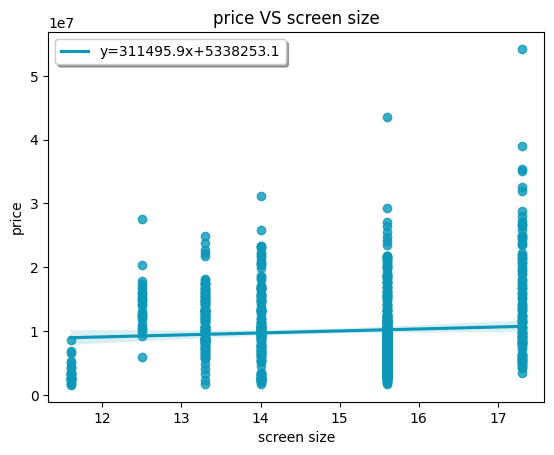

In [1358]:
# Display the learning rate of price vs screen size
slope, intercept = lr_plot(df_clean, 'screen size', 'price', 'upper left')


The regression line is almost flat, meaning that PCs with higher screen inches slightly tends to be more expensive.



### Weight vs Inches


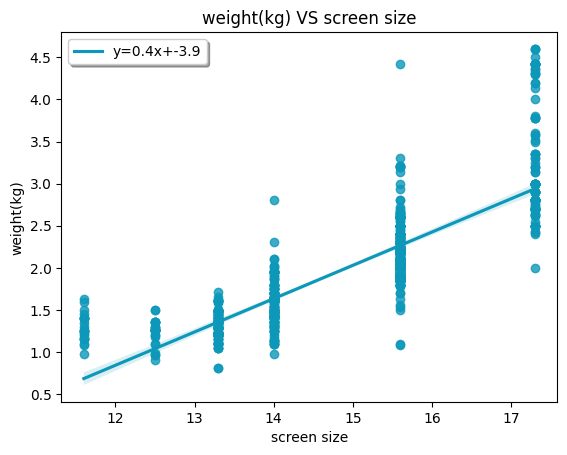

In [1359]:
# Display the learning rate of screen size vs weight(kg)
slope, intercept = lr_plot(df_clean, 'screen size', 'weight(kg)', 'upper left')


As expected, PCs with bigger screens are heavier. In particular, on average, for every additional inch the pc is 400g heavier.



## Price VS CPU brand by GPU brand


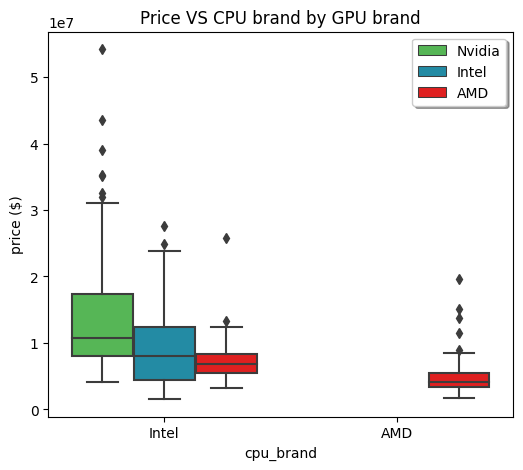

In [1360]:
# Display the boxplot of the Price VS CPU brand by GPU brand
cpu_palette = {'Intel':'#0d98ba', 'AMD':'#FF0000', 'Nvidia':'#46C646'}
fig, ax = plt.subplots(figsize = (6,5))
sns.boxplot(x = 'cpu_brand', y = 'price', data = df_clean, hue = 'gpu_brand', palette = cpu_palette)
ax.set_title('Price vs CPU brand by GPU brand')
plt.ylabel('price ($)')
plt.legend(loc = 'upper right', ncol=1, fancybox = True, shadow = True, frameon = True)
plt.title('Price VS CPU brand by GPU brand')
plt.show()

Insights from this plot:

- Laptops with Intel CPUs are more expensive.
- Laptops with an AMD CPUs also have and AMD GPUs
- Laptops with Nvidia GPUs are more expensive.

## Which are the TOP 15 most common GPUs?


In [1361]:
# List the top 15 CPU brand
gpu_list = df_clean['gpu'].value_counts()[:15].index.tolist()


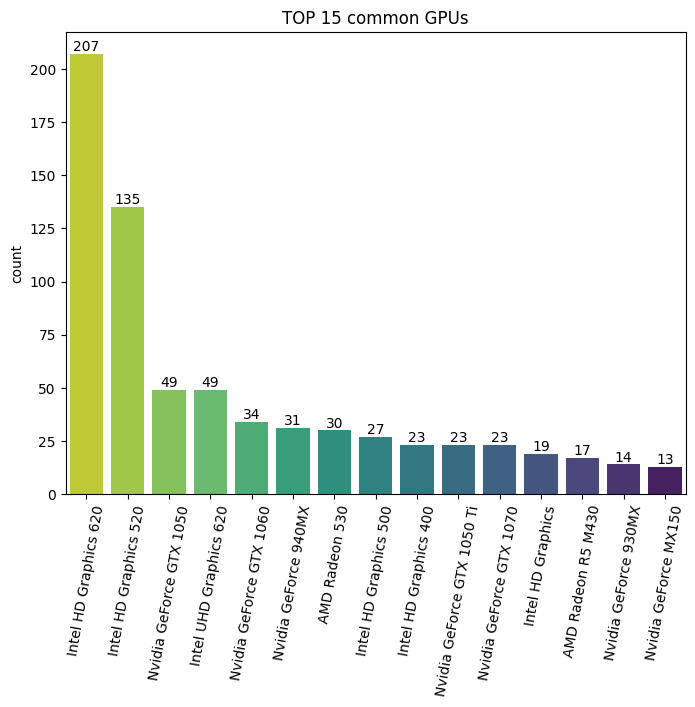

In [1362]:
# Display the top 15 GPU brand using countplot
plt.figure(figsize = (8,6))
ax=sns.countplot(x = 'gpu', data = df_clean[df_clean['gpu'].isin(gpu_list)], order = gpu_list, palette = 'viridis_r')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common GPUs')
plt.xlabel('')
plt.show()

The 2 most common GPUs are integrated Intel GPUs HD Graphics 620 and 520, while the third one is the Nvidia GTX1050.



## Which are the TOP 15 most common CPUs?


In [1363]:
# List the top 15 CPU brand
cpu_list = df_clean['cpu'].value_counts()[:15].index.tolist()

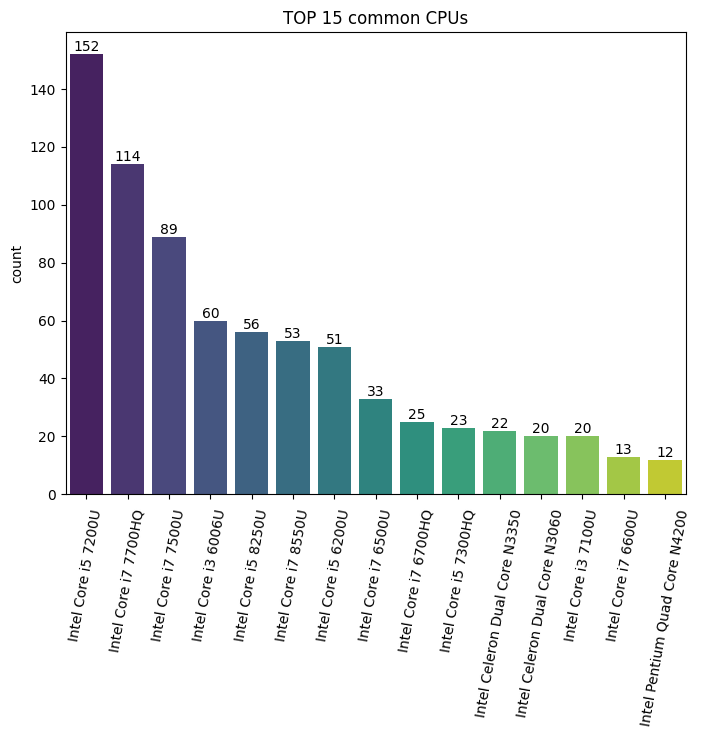

In [1364]:
# Display the top 15 CPU brand using countplot
plt.figure(figsize = (8,6))
ax = sns.countplot(x = 'cpu', data = df_clean[df_clean['cpu'].isin(cpu_list)], order = cpu_list, palette = 'viridis')
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('TOP 15 common CPUs')
plt.xlabel('')
plt.show()

- All the TOP 15 most common CPUs are from Intel.
- The most common CPU is the Intel i5 7200U, second is i7 7700HQ and third is i7 7500U.
- Out of the 15 CPUs, 10 are series 'U' (low voltage) , 3 are series 'HQ' (high performance) 10 and 2 are Celerons (low-end).

## What is the average price of laptops by company?


In [1365]:
# List and count the number of laptop by manufacturer
df_clean['manufacturer'].value_counts()

manufacturer
Dell        217
Lenovo      214
HP          199
Asus        115
Acer         76
Toshiba      39
MSI          38
Razer         6
Apple         6
Mediacom      6
Samsung       4
LG            3
Xiaomi        3
Vero          2
Fujitsu       1
Chuwi         1
Name: count, dtype: int64

In particular, there are companies with less than 10 laptops in the dataset, which is a very low number from which we can extract statistical results.
For this reason, we will consider only laptops with at least 20 laptops in the dataset.

In [1366]:
# List the top 8 laptop manufacturer
company_list = df_clean['manufacturer'].value_counts().index[:8].tolist()
company_list

['Dell', 'Lenovo', 'HP', 'Asus', 'Acer', 'Toshiba', 'MSI', 'Razer']

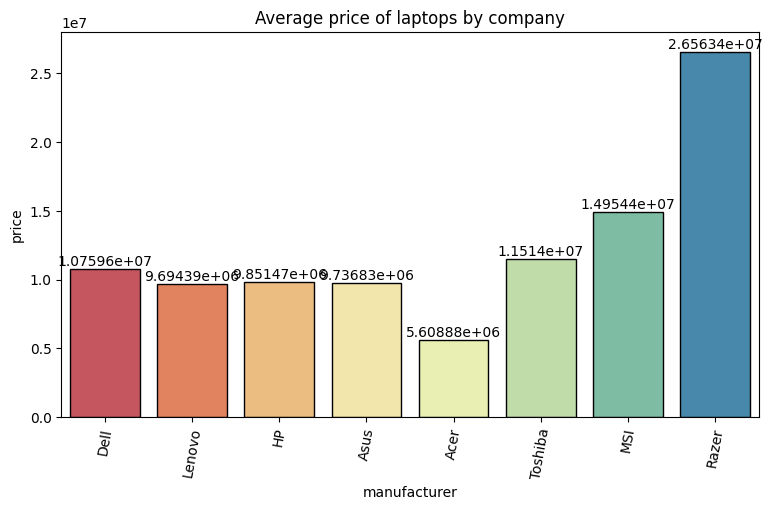

In [1367]:
# Display the Average price of laptops by company
plt.figure(figsize = (9,5))
ax=sns.barplot(x = 'manufacturer', y = 'price', data = df_clean[df_clean['manufacturer'].isin(company_list)],
                order = company_list, 
                palette = 'Spectral', 
                ci = False,
                edgecolor = "black")
plt.xticks(rotation = 80);
ax.bar_label(ax.containers[0])
plt.title('Average price of laptops by company')
plt.show()

- MSI laptops are on average the most expensive.
- Apple laptops are the second most expensive laptops and Toshiba's are 3rd.
- Acer are the cheapest, with an average price of 626$
- Laptops from Dell, Lenovo, HP and Asus have, on average.

### Correlation Matrix


The correlation matrix can give some useful informations about the linear correlation between the numerical features



In [1368]:
print(df_clean.dtypes)


manufacturer                 object
model name                   object
category                     object
screen size                 float64
cpu                          object
ram(GB)                     float64
gpu                          object
operating system             object
operating system version     object
weight(kg)                  float64
price                       float64
resolution                   object
screen_type                  object
touchscreen                 float64
cpu_freq(GHz)               float64
storage_1_gb                float64
storage_1_type               object
storage_2_gb                float64
storage_2_type               object
cpu_brand                    object
gpu_brand                    object
dtype: object


In [1369]:
numeric_columns = df_clean.select_dtypes(include='number').columns  # Select numeric columns
df_numeric = df_clean[numeric_columns]  # Create a new DataFrame with numeric columns only


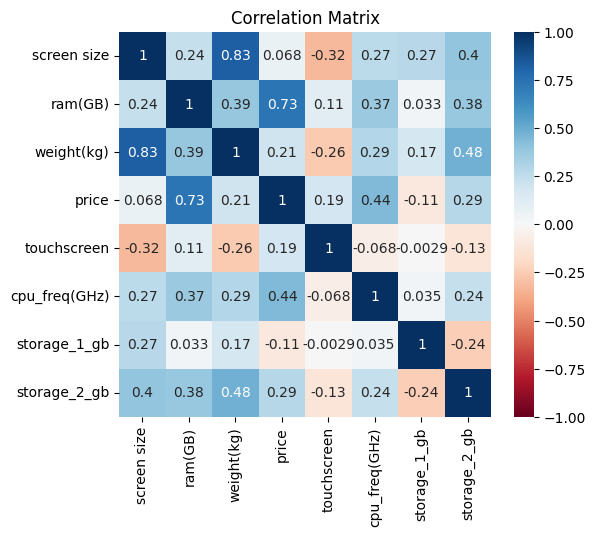

In [1370]:
# Display the Correlation Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.heatmap(df_numeric.corr(), cmap='RdBu', annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


Insights from the correlation matrix:

- RAM has a high positive correlation with price (+0.75): more expensive laptops tends to have a higher pric
- CPU Freq has a quite moderate positive correlation with the price (+0.45)
- Inches and Weight have a high positive correlation (+0.82) since laptops with bigger screens tend to be heavier.

## Data preparation for ML modeling


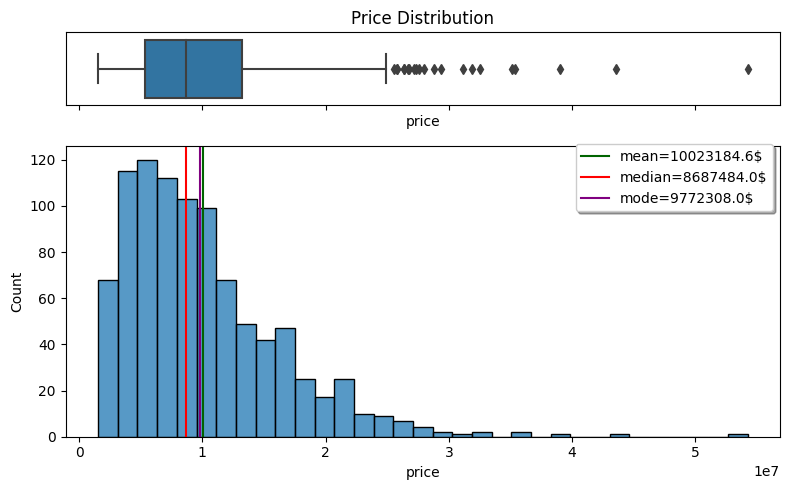

In [1371]:
# Display the boxplot and histogram of the Price Distribution
num_plot(df_clean, 'price', 'Price Distribution','$')

For prediction, we will use the cleaned dataframe 'df_clean'



In [1372]:
# Copy the clean dataset
df1 = df_clean.copy()

Moreover, since the target variable 'price' is right skewed, we will log transform it to improve the prediction performance of the algorithms.

In [1373]:
# Use the log transformation to normalize the price column
df1['price'] = np.log(df1['price'])
df_test['price'] = np.log(df_test['price'])

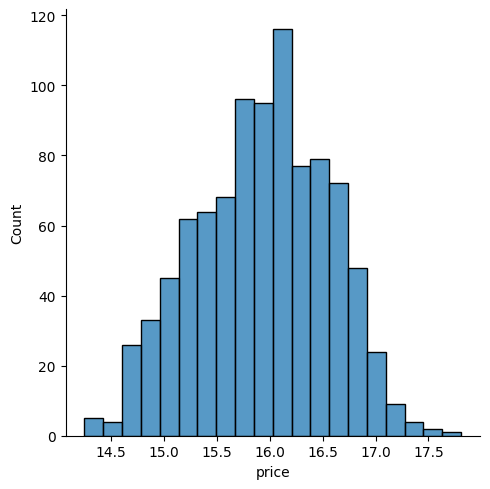

In [1374]:
# Display normalized price distribution
sns.displot(df1['price'])

Indeed now the distribution looks more gaussian.



In [1375]:
# Fill the empty data with nan
df1 = df1.fillna('NaN')
df_test = df_test.fillna('NaN')

### Categorical features encoding

The categorical columns ('company','product','typename','cpu','gpu','opsys','resolution','screentype','resolution','memory_1_type','memory_2_type','gpu_brand','cpu_brand') will be now encoded.
An encoding by one hot encoding would be preferrable in this case since there is not a order/hierarchy among the different categories for each variable, but this would lead to a very high number of columns (around 900), which is close to the number of total rows (1000).
So, if we had more data a OHE encoding would be preferrable, but in case a Label Encoding will be performed to keep the number of features lower.

In [1376]:
# Import the clean test dataset
df2 = pd.read_csv('laptop-clean-test.csv')

In [1377]:
# Display the table info
df_train.columns

Index(['manufacturer', 'model name', 'category', 'screen size', 'cpu',
       'ram(GB)', 'gpu', 'operating system', 'operating system version',
       'weight(kg)', 'price', 'resolution', 'screen_type', 'touchscreen',
       'cpu_freq(GHz)', 'storage_1_gb', 'storage_1_type', 'storage_2_gb',
       'storage_2_type', 'cpu_brand', 'gpu_brand'],
      dtype='object')

In [1378]:
# Initialize the label encoder
cat_cols =  ['manufacturer', 'model name', 'category', 'cpu', 'gpu', 'operating system',
             'resolution', 'screen_type', 'storage_1_type', 'storage_2_type',
             'gpu_brand', 'cpu_brand']

In [1379]:
#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df1, columns = cat_cols, drop_first = True).shape)
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(df2, columns = cat_cols, drop_first = True).shape)

Dataframe encoded by OHE dimension :  (930, 712)
Dataframe encoded by OHE dimension :  (326, 385)


In [1380]:
#Label encoding
en = LabelEncoder()

for cols in cat_cols:
    df1[cols] = en.fit_transform(df1[cols])
    df2[cols] = en.fit_transform(df2[cols])

for cols in cat_cols:
    df_train[cols] = en.fit_transform(df_train[cols])
    df_test[cols] = en.fit_transform(df_test[cols])
    
print('Dataframe encoded by Label encoding dimension : ', df1.shape)
print('Dataframe encoded by Label encoding dimension : ', df2.shape)

Dataframe encoded by Label encoding dimension :  (930, 21)
Dataframe encoded by Label encoding dimension :  (326, 21)


In [1381]:
# Display the table
df1.head()


,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,0,42,1,15.6,49,8.0,58,1,NaN,2.40,...,3,2,0.0,2.5,1000.0,1,0.0,2,1,2
1,4,191,3,15.6,48,8.0,39,4,10,2.14,...,0,2,0.0,2.5,1000.0,1,0.0,2,1,1
2,6,476,5,17.3,63,8.0,83,4,10,3.14,...,3,2,0.0,2.8,500.0,1,0.0,2,1,2
3,8,393,3,14.0,48,8.0,39,4,10,1.70,...,3,2,0.0,2.5,1.0,3,0.0,2,1,1
4,4,463,3,15.6,63,32.0,58,4,10,2.06,...,8,2,1.0,2.8,1000.0,3,0.0,2,1,2


In [1382]:
df2.head()


,manufacturer,model name,category,screen size,cpu,ram(GB),gpu,operating system,operating system version,weight(kg),...,resolution,screen_type,touchscreen,cpu_freq(GHz),storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,4,200,3,"15.6""",14,8.0,12,4,10,2.00,...,3,2,0.0,2.0,256.0,3,0.0,1,1,0
1,8,72,3,"15.6""",23,8.0,46,3,NaN,2.20,...,0,2,0.0,2.5,2000.0,1,0.0,1,1,3
2,7,5,3,"15.6""",33,8.0,34,4,10,2.04,...,0,2,0.0,2.7,2000.0,1,0.0,1,1,2
3,8,109,1,"15.6""",24,8.0,47,3,NaN,2.40,...,3,0,0.0,2.5,256.0,3,0.0,1,1,3
4,7,38,2,"12.5""",33,8.0,34,4,10,1.26,...,3,2,0.0,2.7,512.0,3,0.0,1,1,2


### Data preparation


In [1383]:
df2['screen size'] = df2['screen size'].str.replace('"', '')
x_train = df1.drop('price', axis = 1)
x_train = x_train.drop('operating system version', axis = 1)
x_train = x_train.drop('model name', axis = 1)
x_train = x_train.drop('cpu_freq(GHz)', axis = 1)
y_train = df1['price']

x_test = df_test.drop('price', axis = 1)
x_test = x_test.drop('operating system version', axis = 1)
x_test = x_test.drop('model name', axis = 1)
x_test = x_test.drop('cpu_freq(GHz)', axis = 1)
y_test = df_test['price']

df2['screen size'] = df2['screen size'].str.replace('"', '')
x_external_test = df2.drop('price', axis = 1)
x_external_test = x_external_test.drop('operating system version', axis = 1)
x_external_test = x_external_test.drop('model name', axis = 1)
x_external_test = x_external_test.drop('cpu_freq(GHz)', axis = 1)
y_external_test = df2['price']

In [1384]:
x_train

,manufacturer,category,screen size,cpu,ram(GB),gpu,operating system,weight(kg),resolution,screen_type,touchscreen,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,0,1,15.6,49,8.0,58,1,2.40,3,2,0.0,1000.0,1,0.0,2,1,2
1,4,3,15.6,48,8.0,39,4,2.14,0,2,0.0,1000.0,1,0.0,2,1,1
2,6,5,17.3,63,8.0,83,4,3.14,3,2,0.0,500.0,1,0.0,2,1,2
3,8,3,14.0,48,8.0,39,4,1.70,3,2,0.0,1.0,3,0.0,2,1,1
4,4,3,15.6,63,32.0,58,4,2.06,8,2,1.0,1000.0,3,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,8,4,14.0,56,8.0,35,4,1.70,3,2,0.0,256.0,3,0.0,2,1,1
926,8,1,15.6,63,16.0,59,4,2.50,3,0,0.0,256.0,3,1000.0,0,1,2
927,11,1,14.0,63,16.0,61,4,1.95,3,2,0.0,512.0,3,0.0,2,1,2
928,2,3,15.6,63,16.0,61,4,2.20,3,2,0.0,128.0,3,1000.0,0,1,2


In [1385]:
x_external_test

,manufacturer,category,screen size,cpu,ram(GB),gpu,operating system,weight(kg),resolution,screen_type,touchscreen,storage_1_gb,storage_1_type,storage_2_gb,storage_2_type,cpu_brand,gpu_brand
0,4,3,15.6,14,8.0,12,4,2.00,3,2,0.0,256.0,3,0.0,1,1,0
1,8,3,15.6,23,8.0,46,3,2.20,0,2,0.0,2000.0,1,0.0,1,1,3
2,7,3,15.6,33,8.0,34,4,2.04,0,2,0.0,2000.0,1,0.0,1,1,2
3,8,1,15.6,24,8.0,47,3,2.40,3,0,0.0,256.0,3,0.0,1,1,3
4,7,2,12.5,33,8.0,34,4,1.26,3,2,0.0,512.0,3,0.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,4,4,13.3,33,16.0,34,4,1.20,9,2,1.0,1000.0,3,0.0,1,1,2
322,6,4,12.3,27,8.0,33,0,1.10,5,2,1.0,128.0,3,0.0,1,1,2
323,8,3,17.3,33,6.0,46,4,2.80,2,2,0.0,128.0,3,1000.0,0,1,3
324,2,4,14.0,33,8.0,34,4,1.10,3,2,0.0,512.0,3,0.0,1,1,2


### Train - Validation split

Moreover, we define an additional validation set, which will be used to monitor overfitting.



In [1386]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = seed)

## Training First Model - Linear Regression 

### Predict modal using Internal test dataset


In [1387]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(x_val)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))


Mean Squared Error: 0.10312550463506277
Coefficients: 
 [ 1.27234323e-02  2.64266833e-02 -6.12414269e-02  1.34192813e-02
  3.33410141e-02  1.06713713e-02  7.21130372e-02  5.85729155e-02
  6.16291312e-02  3.99599174e-03  1.25249579e-01  7.56706600e-05
  1.50360283e-01 -5.93118003e-05 -8.51774636e-02 -2.76204139e-01
 -2.00297397e-01]
Mean squared error: 0.10
Coefficient of determination: 0.73


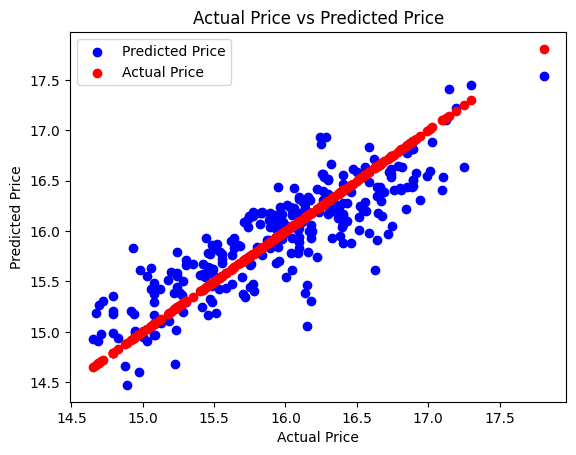

In [1388]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.scatter(y_val, y_pred, color='blue', label='Predicted Price')
plt.scatter(y_val, y_val, color='red', label='Actual Price')

# Add labels and title to the plot
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

# Add a legend
plt.legend()

# Show the plot
plt.show()


### Predict modal using External test dataset

In [1389]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(x_external_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_external_test, y_pred)
print("Mean Squared Error:", mse)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_external_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_external_test, y_pred))


Mean Squared Error: 133085340513801.34
Coefficients: 
 [ 1.27234323e-02  2.64266833e-02 -6.12414269e-02  1.34192813e-02
  3.33410141e-02  1.06713713e-02  7.21130372e-02  5.85729155e-02
  6.16291312e-02  3.99599174e-03  1.25249579e-01  7.56706600e-05
  1.50360283e-01 -5.93118003e-05 -8.51774636e-02 -2.76204139e-01
 -2.00297397e-01]
Mean squared error: 133085340513801.34
Coefficient of determination: -2.56


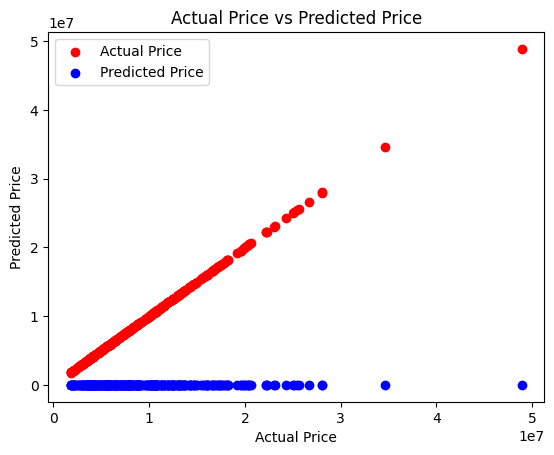

In [1390]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.scatter(y_external_test, y_external_test, color='red', label='Actual Price')
plt.scatter(y_external_test, y_pred, color='blue', label='Predicted Price')


# Add labels and title to the plot
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Streamlit Model

In [1413]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

dfmodel = pd.read_csv('laptop-clean-train.csv')
dfmodel_test = pd.read_csv('laptop-clean-test.csv')
dfmodel['screen size'] = dfmodel['screen size'].str.replace('"', '')
dfmodel_test['screen size'] = dfmodel_test['screen size'].str.replace('"', '')

In [1421]:
# Initialize the label encoder
cat_cols =  ['manufacturer', 'category', 'cpu', 'gpu', 'operating system',
            'resolution', 'screen_type', 'storage_1_type', 'storage_2_type',
            'gpu_brand', 'cpu_brand']

#One hot encoding
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(dfmodel, columns = cat_cols, drop_first = True).shape)
print('Dataframe encoded by OHE dimension : ', pd.get_dummies(dfmodel_test, columns = cat_cols, drop_first = True).shape)

#Label encoding
en = LabelEncoder()

for cols in cat_cols:
    dfmodel[cols] = en.fit_transform(dfmodel[cols])
    dfmodel_test[cols] = en.fit_transform(dfmodel_test[cols])


x_train = dfmodel.drop('price', axis=1)
x_train = x_train.drop('operating system version', axis=1)
x_train = x_train.drop('model name', axis=1)
x_train = x_train.drop('cpu_freq(GHz)', axis=1)
y_train = dfmodel['price']

x_test = dfmodel_test.drop('price', axis=1)
x_test = x_test.drop('operating system version', axis=1)
x_test = x_test.drop('model name', axis=1)
x_test = x_test.drop('cpu_freq(GHz)', axis=1)
y_test = dfmodel_test['price']

Dataframe encoded by OHE dimension :  (965, 242)
Dataframe encoded by OHE dimension :  (326, 170)


### Training Model

In [1422]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size = 0.3, random_state = 0)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

#Make predictions on the validation data
y_pred = model.predict(x_val)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_val, y_pred)
print("Mean Squared Error:", mse)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_val, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_val, y_pred))

Mean Squared Error: 13307831272445.988
Coefficients: 
 [ 1.18944190e+05  4.46067202e+05 -6.21485015e+05  6.91092760e+04
  5.52042836e+05  5.46653448e+04  4.78214461e+05  1.11885251e+06
  4.31281742e+05  5.40715792e+03  9.71574417e+05 -8.82526415e+02
  5.52286590e+05 -3.81081570e+02 -2.29085026e+05 -2.03601085e+06
 -7.49614463e+05]
Mean squared error: 13307831272445.99
Coefficient of determination: 0.68


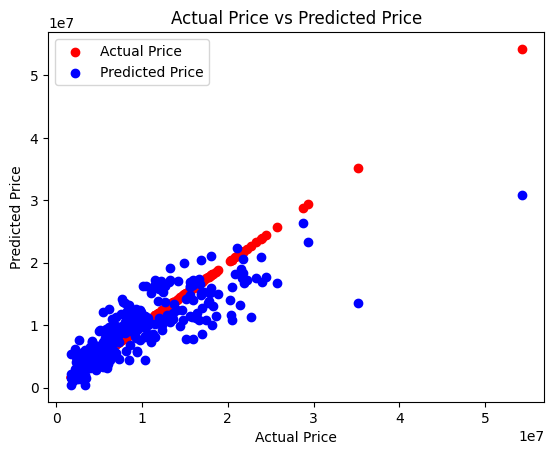

In [1423]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.scatter(y_val, y_val, color='red', label='Actual Price')
plt.scatter(y_val, y_pred, color='blue', label='Predicted Price')


# Add labels and title to the plot
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Compare with Test set

In [1425]:

# Create an instance of LinearRegression
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Fit the model on the training data
model.fit(x_train, y_train)

# Make predictions on the validation data
y_pred = model.predict(x_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# The coefficients
print("Coefficients: \n", model.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Mean Squared Error: 25371671752843.926
Coefficients: 
 [ 1.18944190e+05  4.46067202e+05 -6.21485015e+05  6.91092760e+04
  5.52042836e+05  5.46653448e+04  4.78214461e+05  1.11885251e+06
  4.31281742e+05  5.40715792e+03  9.71574417e+05 -8.82526415e+02
  5.52286590e+05 -3.81081570e+02 -2.29085026e+05 -2.03601085e+06
 -7.49614463e+05]
Mean squared error: 25371671752843.93
Coefficient of determination: 0.32


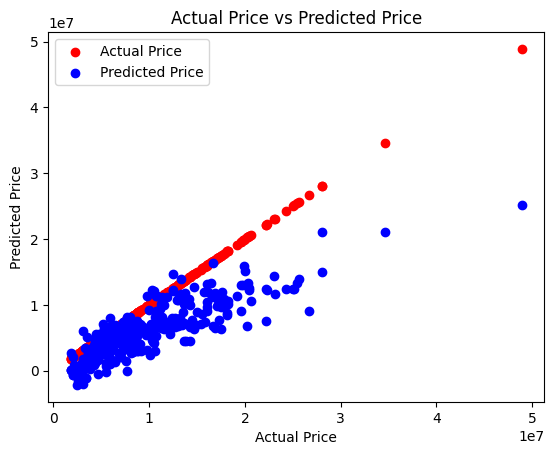

In [1426]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values
plt.scatter(y_test, y_test, color='red', label='Actual Price')
plt.scatter(y_test, y_pred, color='blue', label='Predicted Price')


# Add labels and title to the plot
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Model Metohod

In [1427]:
def predict_laptop_price_model(data_input):
    from sklearn.model_selection import train_test_split
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import r2_score


    # Create an instance of LinearRegression
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(x_train, y_train)

    return model.predict(data_input)

In [1428]:
label_encoder = LabelEncoder()

def convert_inr_to_myr(amount_inr):
    amount_myr = amount_inr * 0.054767
    return amount_myr


def predict_laptop_price(manufacturer, category, screen_size, cpu, ram, gpu, operating_system, weight, resolution, screen_type, touchscreen, storage_1_gb, storage_1_type, storage_2_gb, storage_2_type, cpu_brand, gpu_brand):
    # Create a dictionary with the laptop characteristics
    laptop = {
        'manufacturer': [manufacturer],
        'category': [category],
        'screen size': [screen_size],
        'cpu': [cpu],
        'ram(GB)': [ram],
        'gpu': [gpu],
        'operating system': [operating_system],
        'weight(kg)': [weight],
        'resolution': [resolution],
        'screen_type': [screen_type],
        'touchscreen': [touchscreen],
        'storage_1_gb': [storage_1_gb],
        'storage_1_type': [storage_1_type],
        'storage_2_gb': [storage_2_gb],
        'storage_2_type': [storage_2_type],
        'cpu_brand': [cpu_brand],
        'gpu_brand': [gpu_brand]
    }
    
    # Create a DataFrame from the laptop dictionary
    df = pd.DataFrame(laptop)
    
    # Encode categorical columns using the label encoder
    categorical_cols =  ['manufacturer', 'category', 'cpu', 'gpu', 'operating system',
                'resolution', 'screen_type', 'storage_1_type', 'storage_2_type',
                'gpu_brand', 'cpu_brand']
    
    for col in categorical_cols:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Make the price prediction using the trained model
    predicted_price = predict_laptop_price_model(df.values)    
    
    return convert_inr_to_myr(predicted_price[0])

In [1429]:
# predicted_price = predict_laptop_price_model('Apple', 'Netbook', 15.6, 'E-Series 6110', 6, 'Radeon 530', 'Chrome OS', 2.7, '3200x1800', 'IPSPanel', 'Touchscreen', 32, 'SSD', 256, 'SSD', 'AMD', 'AMD')

# print(predicted_price)

laptop_info = ('Apple', 'Netbook', 15.6, 'E-Series 6110', 6, 'Radeon 530', 'Chrome OS', 2.7, '3200x1800', 'IPSPanel', 1, 32, 'SSD', 256, 'SSD', 'AMD', 'AMD')
predicted_price = predict_laptop_price(*laptop_info)

print(predicted_price)


30403.106060181657
